<a href="https://colab.research.google.com/github/surabhi-priyadarshini/My_JPEG_App/blob/main/my_JPEG_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **APP Prototype Name-MY JPEG(My Journey Plan with Electric Gadi )**

**Project Type - EDA**

**Project By - Surabhi Priyadarshini & Adarsh Mahajan**



Github link-

### **Project Summary -**

### **Problem Statement**

Develop and design a mobile application that revolutionizes the electric vehicle (EV) charging experience. The app will address the key challenges faced by EV owners, including the lack of a centralized platform for locating and accessing charging stations, uncertainty about station availability, and the inconvenience of managing charging sessions. By providing a seamless, user-friendly interface, real-time updates on station availability, and integrated payment options, the app aims to simplify the EV charging process, encourage EV adoption, and contribute to a greener, more sustainable future.

### **Attribute Information**

1. **Station ID**: Unique identifier for each charging station.
2. **City**: City name where the charging stations are available
3. **Station Name**: Name or identifier of the charging station.
4. **Charging Speed**: Speed of the charger (e.g., fast, slow).
5. **Number of Chargers**: Number of charging ports available.
6. **Usage Data**: Historical usage data, including the number of charges per day, average charging duration, etc.
7. **Availability**: Real-time or historical data on charger availability.
8. **Pricing**: Cost of charging (per kWh or per minute).
9. **Station Type**: Type of station (e.g., public, private, commercial).
10. **Connector Types**: Types of connectors available (e.g., CCS, CHAdeMO, Type 2).
11. **Power Output**: Maximum power output of the charging station.
12. **Amenities**: Additional facilities available at the station (e.g., restrooms, shops).
13. **Operational Hours**: Hours during which the station is operational.
14. **Payment Methods**: Accepted payment methods (e.g., credit card, app payment).
15. **User Ratings and Reviews**: Feedback from users about the charging station.
16. **Network**: Charging network the station is part of (e.g., Tesla Supercharger, ChargePoint).
17. **Maintenance Data**: Maintenance history and incidents.
18. **Nearby Facilities:** Information about nearby facilities (e.g., restaurants, shops).
19. **Traffic Data**: Data on traffic flow around the station.

### **Know Your Data**

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# **Dataset Loading**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ev_charging_station_data.csv')

In [ ]:
df.shape

(100, 20)

In [ ]:
df.head()

,Station_ID,City,Station_Name,Charging_Speed,Number_of_Chargers,Average_Charging_Duration,Average_Charges_per_Day,Availability,Pricing_per_kWh,Station_Type,Connector_Types,Power_Output_kW,Amenities,Operational_Hours,Payment_Methods,User_Ratings,Network,Maintenance_Incidents,Nearby_Facilities,Traffic_Data
0,ST001,Bareilly,Station_001,Fast,9,108.708642,33.030071,Available,0.25,Private,CHAdeMO,292,NaN,24/7,Both,1.7,EVgo,4,Shopping Mall,Low
1,ST002,Belgaum,Station_002,Slow,5,97.987555,8.840636,Available,0.13,Private,CCS,80,Restroom,8 AM - 8 PM,App Payment,4.7,EVgo,1,Restaurant,Medium
2,ST003,Thane,Station_003,Fast,6,84.203165,7.325677,Available,0.41,Private,Type 2,89,Shop,9 AM - 9 PM,Both,2.7,EVgo,2,Shopping Mall,Medium
3,ST004,Cuttack,Station_004,Fast,4,28.413996,28.910958,Available,0.32,Commercial,CCS,278,Restroom,8 AM - 8 PM,App Payment,2.5,ChargePoint,0,Shopping Mall,High
4,ST005,Mira-Bhayandar,Station_005,Fast,7,36.162871,29.328580,Available,0.27,Commercial,CHAdeMO,85,Restroom,8 AM - 8 PM,App Payment,3.1,Tesla Supercharger,2,Restaurant,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Station_ID                 100 non-null    object 
 1   City                       100 non-null    object 
 2   Station_Name               100 non-null    object 
 3   Charging_Speed             100 non-null    object 
 4   Number_of_Chargers         100 non-null    int64  
 5   Average_Charging_Duration  100 non-null    float64
 6   Average_Charges_per_Day    100 non-null    float64
 7   Availability               100 non-null    object 
 8   Pricing_per_kWh            100 non-null    float64
 9   Station_Type               100 non-null    object 
 10  Connector_Types            100 non-null    object 
 11  Power_Output_kW            100 non-null    int64  
 12  Amenities                  67 non-null     object 
 13  Operational_Hours          100 non-null    object 


In [ ]:
df.isnull().sum()

Station_ID                    0
City                          0
Station_Name                  0
Charging_Speed                0
Number_of_Chargers            0
Average_Charging_Duration     0
Average_Charges_per_Day       0
Availability                  0
Pricing_per_kWh               0
Station_Type                  0
Connector_Types               0
Power_Output_kW               0
Amenities                    33
Operational_Hours             0
Payment_Methods               0
User_Ratings                  0
Network                       0
Maintenance_Incidents         0
Nearby_Facilities            36
Traffic_Data                  0
dtype: int64

# **Exploratory Data Analysis**


# **Summary Statistics**

In [ ]:
df.describe()

,Number_of_Chargers,Average_Charging_Duration,Average_Charges_per_Day,Pricing_per_kWh,Power_Output_kW,User_Ratings,Maintenance_Incidents
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,4.850000,72.718857,26.742973,0.321200,188.250000,3.015000,2.140000
std,2.761112,29.339503,13.235399,0.125411,90.350873,1.192263,1.407197
min,1.000000,20.506158,5.647707,0.100000,50.000000,1.100000,0.000000
25%,2.750000,48.509903,15.563571,0.210000,111.750000,2.000000,1.000000
50%,5.000000,76.918489,27.381923,0.330000,182.500000,3.100000,2.000000
75%,7.000000,98.360949,37.286140,0.440000,269.750000,3.925000,3.000000
max,9.000000,119.005385,49.572731,0.500000,349.000000,5.000000,4.000000


### **Exploratory Data Analysis**

## **VISUALIZATIONS**

### **Distribution of Pricing per kWh**

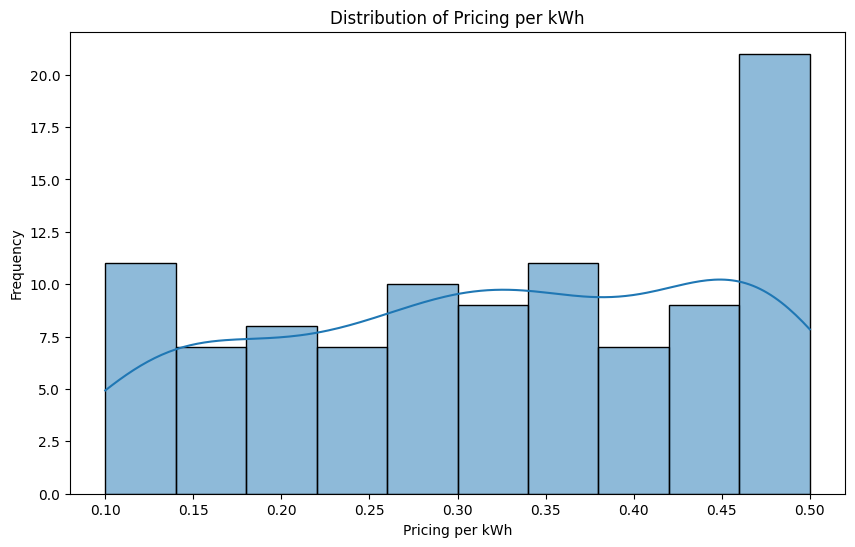

In [ ]:


# Histogram for Pricing_per_kWh
plt.figure(figsize=(10, 6))
sns.histplot(df['Pricing_per_kWh'], bins=10, kde=True)
plt.title('Distribution of Pricing per kWh')
plt.xlabel('Pricing per kWh')
plt.ylabel('Frequency')
plt.show()


**Conclusion**

->**Most Common Pricing**: The most frequent pricing per kWh is around 0.50, as indicated by the highest bar and peak in the KDE curve.

->**Bimodal Distribution**: The pricing data shows two modes, around 0.10 and 0.50, indicating two popular price points.

->**Uniform Distribution in Mid-Range**: Prices between 0.15 and 0.35 are more evenly distributed, without significant peaks.

->**Variability**: There is considerable variability in the pricing per kWh, as evidenced by the spread of the histogram bars.

### **Distribution of Number_of_Chargers across different cities**



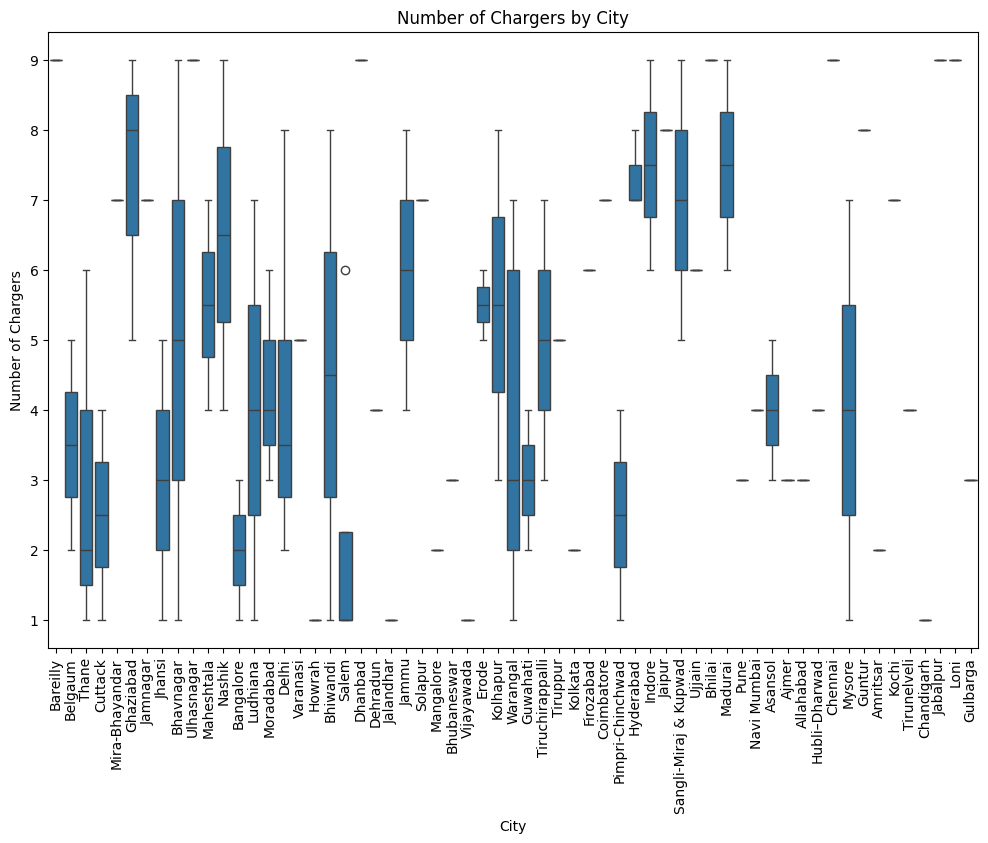

In [ ]:
# Box plot for Number_of_Chargers by City
plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='Number_of_Chargers', data=df)
plt.title('Number of Chargers by City')
plt.xlabel('City')
plt.ylabel('Number of Chargers')
plt.xticks(rotation=90)
plt.show()


**CONCLUSION**:

Each box plot represents the distribution of the number of chargers in a particular city.

The horizontal line inside each box represents the median number of chargers for that city.

### **Relationship between Power_Output_kW and Average_Charging_Duration**

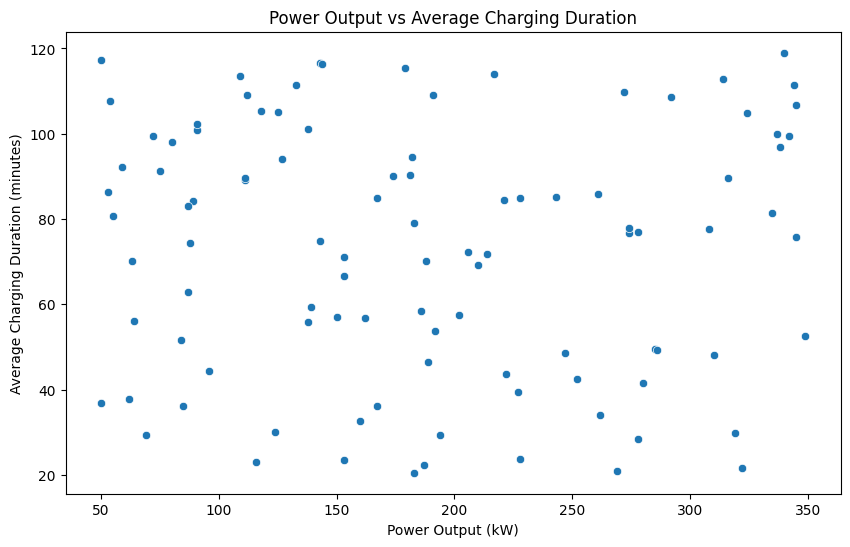

In [ ]:
# Scatter plot for Power_Output_kW vs Average_Charging_Duration
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Power_Output_kW', y='Average_Charging_Duration', data=df)
plt.title('Power Output vs Average Charging Duration')
plt.xlabel('Power Output (kW)')
plt.ylabel('Average Charging Duration (minutes)')
plt.show()


**CONCLUSION**:
1. **No Clear Correlation**: The scatter plot does not show a clear linear or non-linear correlation between power output and average charging duration. The points are scattered without a distinct pattern, indicating that the charging duration does not depend straightforwardly on the power output.

2. **High Power Output, High Duration**: Some stations with very high power outputs (e.g., above 300 kW) still exhibit high charging durations (close to 100 minutes), which may imply either larger battery capacities being charged or inefficiencies in the charging process.

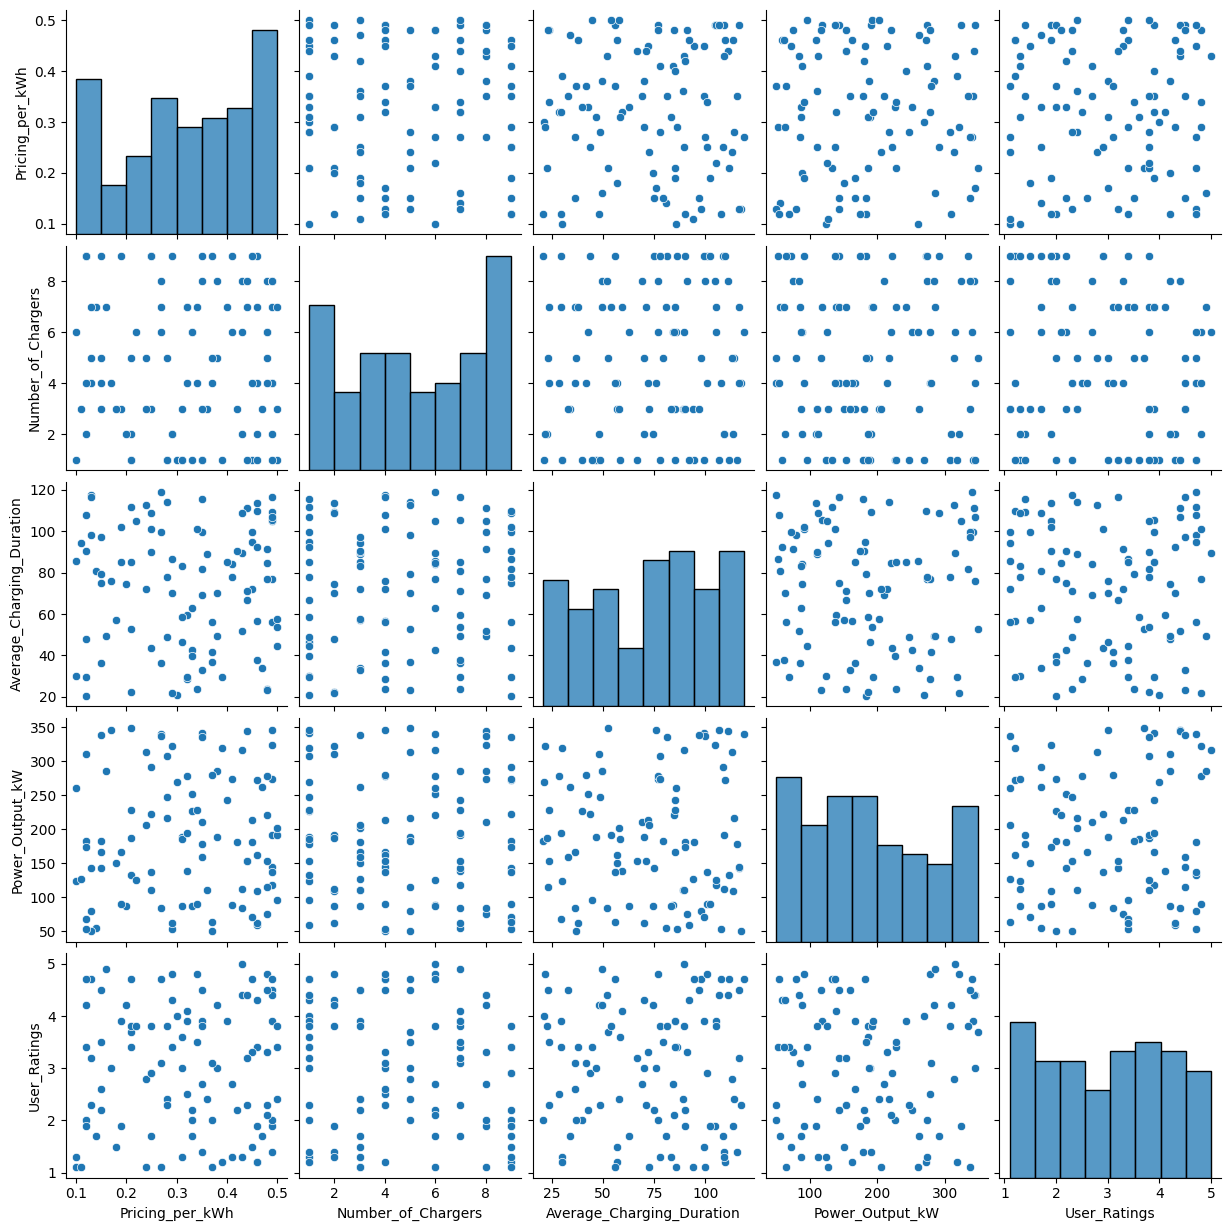

In [ ]:
# Pair plot for multiple numerical variables
sns.pairplot(df[['Pricing_per_kWh', 'Number_of_Chargers', 'Average_Charging_Duration', 'Power_Output_kW', 'User_Ratings']])
plt.show()


**CONCLUSION:**

->**Pricing_per_kWh vs. Number_of_Chargers**: No clear correlation; pricing does not seem to depend on the number of chargers.

->**Pricing_per_kWh vs. Average_Charging_Duration**: No clear correlation; pricing does not seem to depend on charging duration.

->**Pricing_per_kWh vs. Power_Output_kW**: No clear correlation; pricing does not seem to depend on power output.

->**Pricing_per_kWh vs. User_Ratings**: No clear correlation; pricing does not seem to impact user ratings.

->**Number_of_Chargers vs. Average_Charging_Duration**: No clear correlation; the number of chargers does not impact charging duration.

->**Number_of_Chargers vs. Power_Output_kW**: No clear correlation; the number of chargers does not depend on power output.

->**Number_of_Chargers vs. User_Ratings**: No clear correlation; the number of chargers does not impact user ratings.

->**Average_Charging_Duration vs. Power_Output_kW**: No clear correlation; power output does not straightforwardly influence charging duration.

->**Average_Charging_Duration vs. User_Ratings:** No clear correlation; charging duration does not impact user ratings.

->**Power_Output_kW vs. User_Ratings**: No clear correlation; power output does not impact user ratings.

### **Average Pricing per kWh by City**

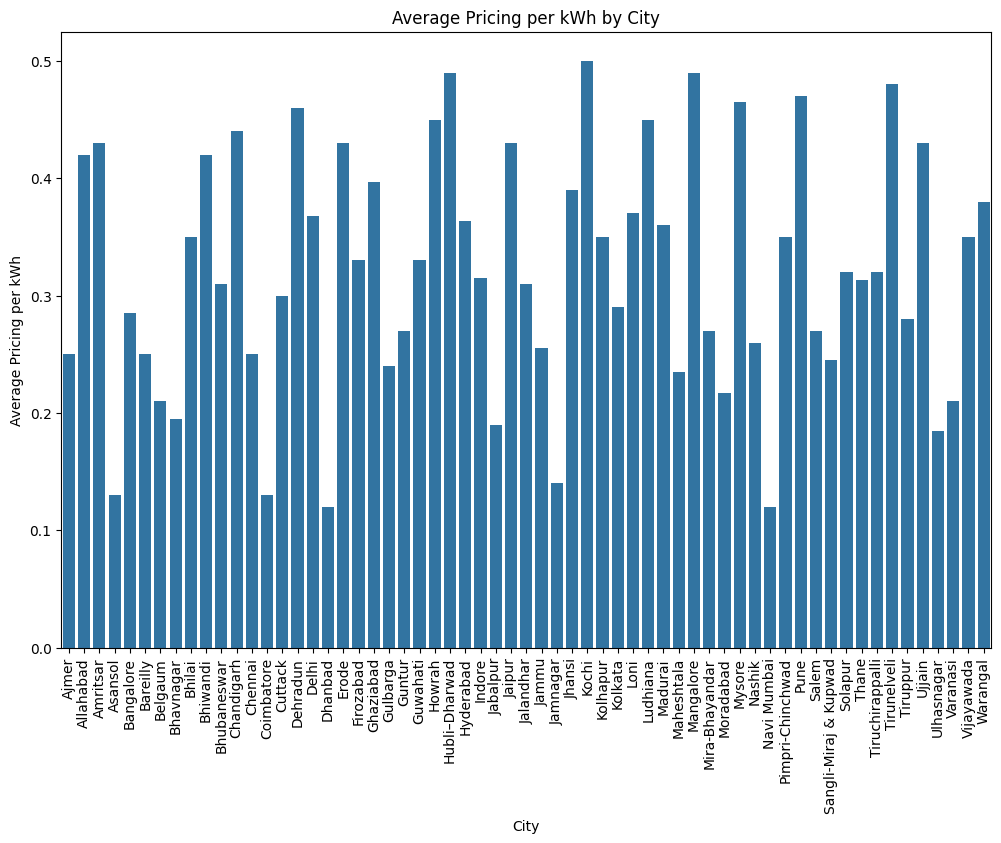

In [ ]:
# Bar plot for average Pricing_per_kWh by City
plt.figure(figsize=(12, 8))
avg_pricing_per_city = df.groupby('City')['Pricing_per_kWh'].mean().reset_index()
sns.barplot(x='City', y='Pricing_per_kWh', data=avg_pricing_per_city)
plt.title('Average Pricing per kWh by City')
plt.xlabel('City')
plt.ylabel('Average Pricing per kWh')
plt.xticks(rotation=90)
plt.show()


**CONCLUSION**:

->Each bar represents the average pricing per kWh for a specific city.

->The height of each bar indicates the average price in that city.

->Cities like Dhanbad, Hubli-Dharwad, Ahmedabad, Bangalore, and Jaipur have higher average pricing, close to 0.50 per kWh.

->Cities like Ghaziabad, Jabalpur, and Bareilly have lower average pricing, closer to 0.10 per kWh.

->The significant variation in average pricing per kWh indicates that EV users will experience different costs depending on their location. Users in cities with higher average pricing will incur higher costs for charging their vehicles.



### **Heatmap**

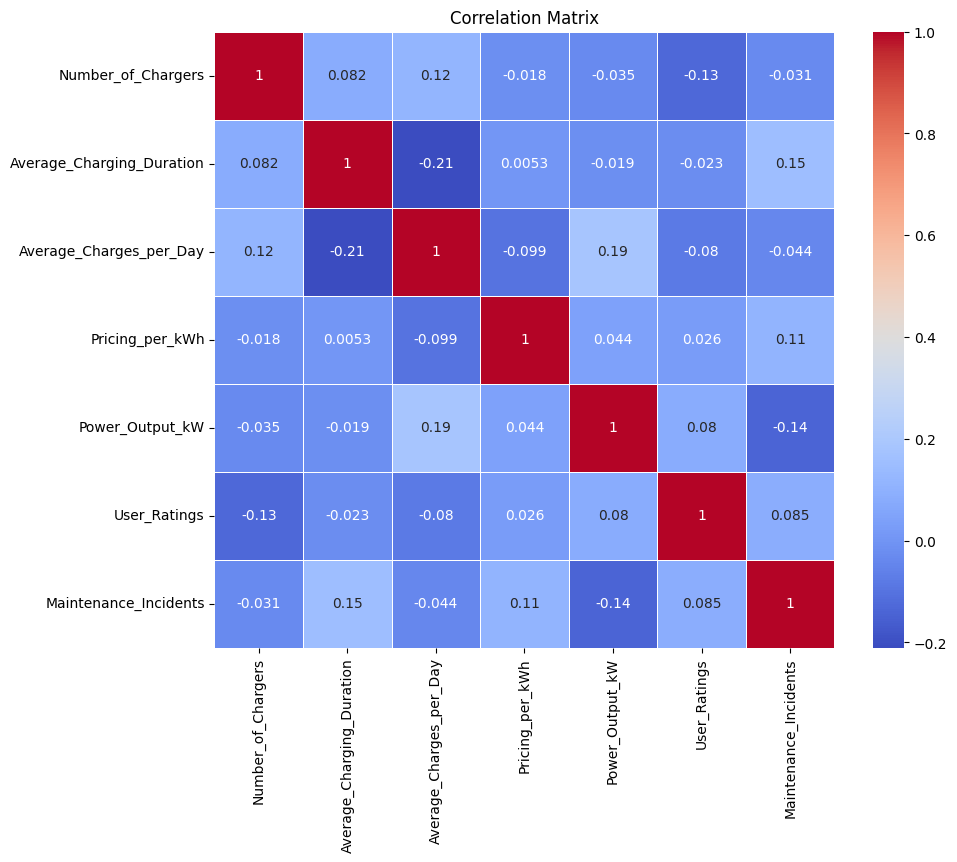

In [ ]:

# Filtering only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


**CONCLUSION**:

**Number of Chargers**:

Shows a weak positive correlation with Average_Charging_Duration (0.082) and Average_Charges_per_Day (0.12).
Slight negative correlation with other variables, but not significant.

**Average Charging Duration:**

Moderate negative correlation with Average_Charges_per_Day (-0.21).
Weak correlations with other variables.

**Average Charges per Day**:

Moderate negative correlation with Average_Charging_Duration (-0.21).
Weak positive correlation with Power_Output_kW (0.19).

**Pricing per kWh:**

Weak positive correlation with Maintenance_Incidents (0.11).
Weak correlations with other variables.

**Power Output (kW)**:

Weak positive correlation with Average_Charges_per_Day (0.19).
Weak negative correlation with Maintenance_Incidents (-0.14).

**User Ratings**:

Weak positive correlation with Maintenance_Incidents (0.085).
Weak negative correlation with Number_of_Chargers (-0.13).

**Maintenance Incidents:**

Weak positive correlation with Average_Charging_Duration (0.15) and Pricing_per_kWh (0.11).
Weak negative correlation with Power_Output_kW (-0.14).

### **User_Ratings by City**

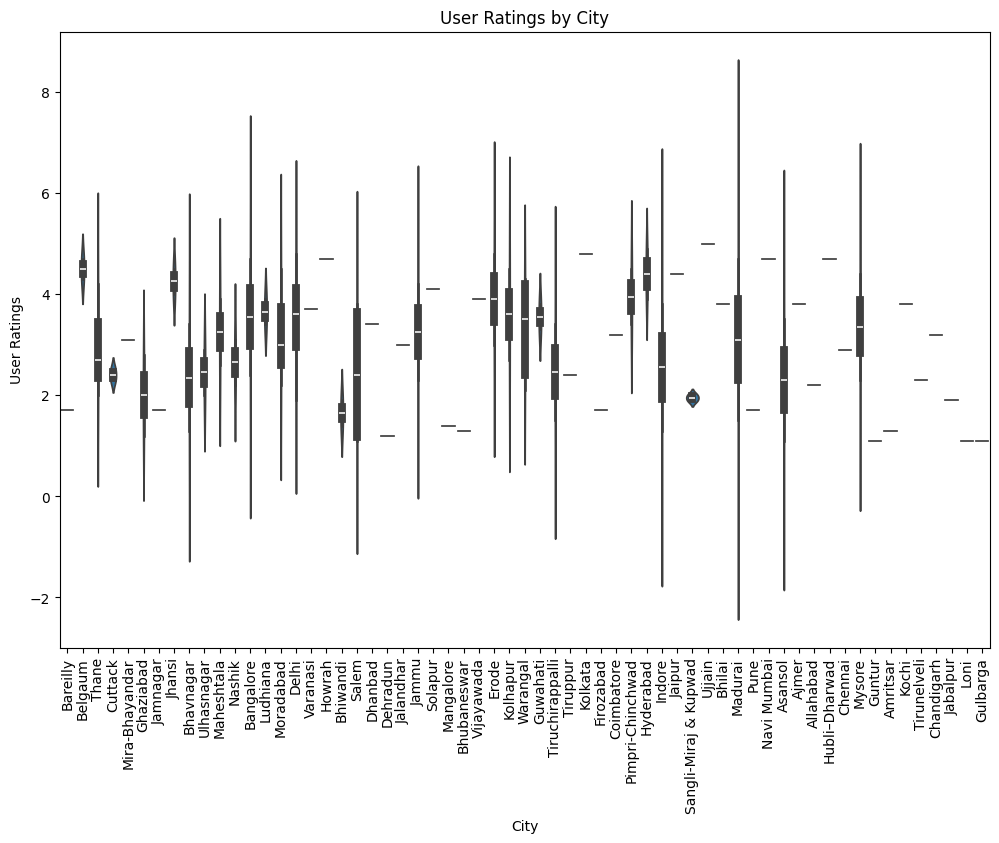

In [ ]:
# Violin plot for User_Ratings by City
plt.figure(figsize=(12, 8))
sns.violinplot(x='City', y='User_Ratings', data=df)
plt.title('User Ratings by City')
plt.xlabel('City')
plt.ylabel('User Ratings')
plt.xticks(rotation=90)
plt.show()


**CONCLUSION**:

♦ The user ratings vary widely across different cities.

♦ The median rating (represented by the line inside each box) differs from city to city.

♦ Some cities have a higher median rating (e.g., cities where the box is positioned higher on the y-axis), while others have lower median ratings.

♦ The presence of outliers and the variability in ratings suggest that there might be inconsistent quality or service issues in some cities.



### **Time Series Analysis**

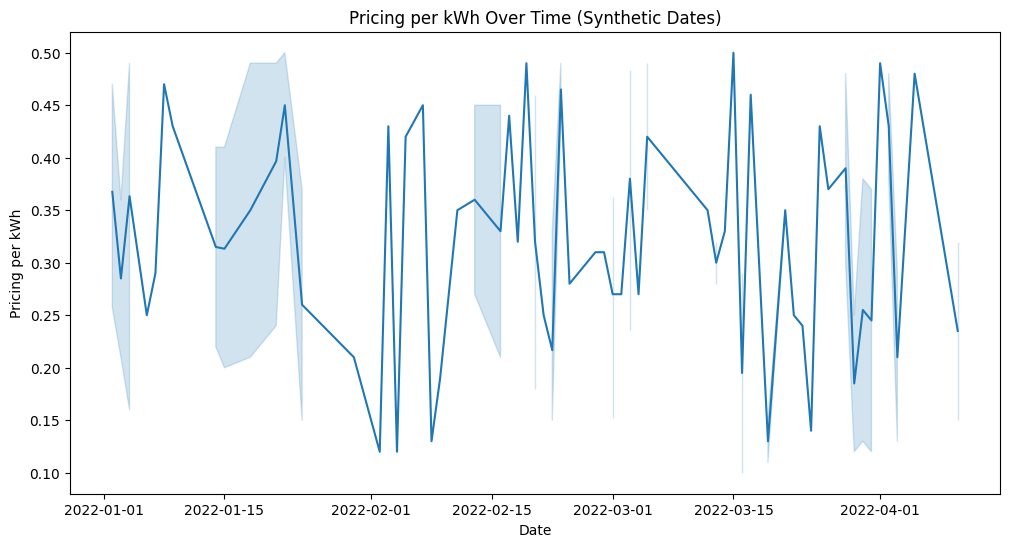

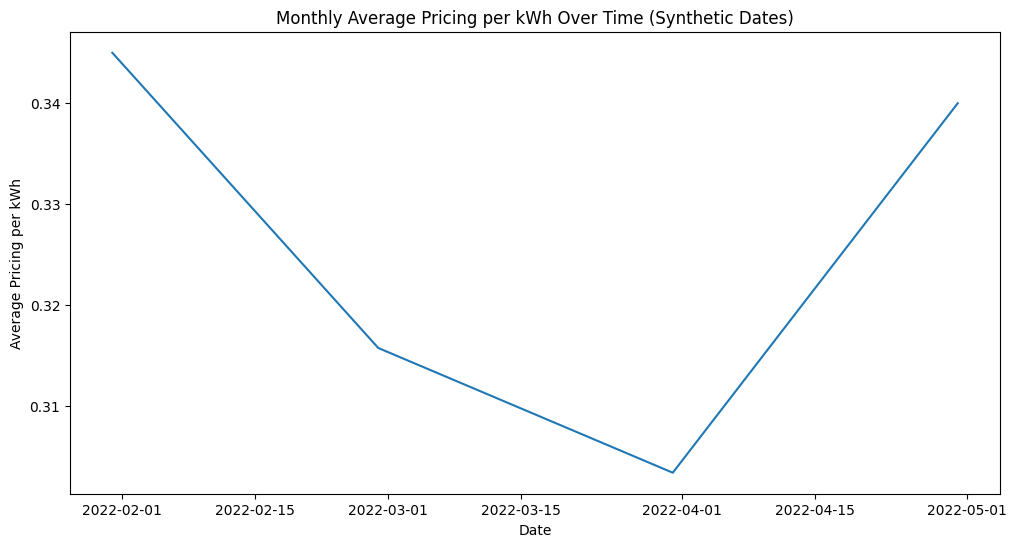

In [ ]:


# Creating a synthetic date column
np.random.seed(42)  # For reproducibility
num_rows = len(df)
start_date = pd.to_datetime('2022-01-01')
date_range = pd.date_range(start_date, periods=num_rows, freq='D')
df['Date'] = np.random.choice(date_range, size=num_rows, replace=True)
df.sort_values(by='Date', inplace=True)



# Performing time series analysis on Pricing_per_kWh
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Pricing_per_kWh', data=df)
plt.title('Pricing per kWh Over Time (Synthetic Dates)')
plt.xlabel('Date')
plt.ylabel('Pricing per kWh')
plt.show()


# Resampling to monthly data to observe trends
df.set_index('Date', inplace=True)
monthly_avg_pricing = df['Pricing_per_kWh'].resample('M').mean()


plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_avg_pricing.index, y=monthly_avg_pricing.values)
plt.title('Monthly Average Pricing per kWh Over Time (Synthetic Dates)')
plt.xlabel('Date')
plt.ylabel('Average Pricing per kWh')
plt.show()


**CONCLUSION:**

**High Variability**: The pricing per kWh exhibits significant fluctuations over time. There are multiple peaks and troughs, indicating that the pricing is not stable and varies frequently.

**No Clear Trend**: There is no obvious upward or downward trend over the observed period. The prices seem to oscillate without showing a long-term increase or decrease.





**Overall Trend**:

The pricing per kWh starts at around 0.34 in early February 2022.
There is a noticeable decline in pricing, reaching its lowest point around early April 2022, where the average pricing per kWh is approximately 0.30.

**Pricing Fluctuations**:

After hitting the low in early April 2022, the pricing per kWh begins to increase again.
By the end of the observed period in May 2022, the pricing per kWh has risen back to around 0.34.

The pricing per kWh experienced a significant drop from February to early April 2022, followed by a sharp increase from early April to May 2022.
This pattern indicates a U-shaped trend in the average pricing per kWh over the given period.

### **Linear Regression Model**

Mean Squared Error: 1.313519851776066e-28
R-squared: 1.0


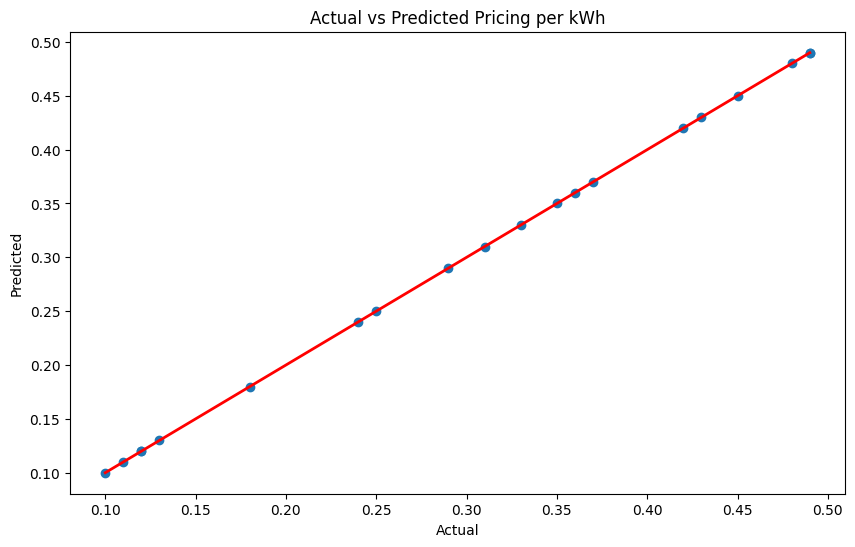

In [ ]:

# Selecting features (X) and target (y)
X = df[['Number_of_Chargers', 'Average_Charging_Duration', 'Average_Charges_per_Day',
        'Pricing_per_kWh', 'Power_Output_kW', 'User_Ratings', 'Maintenance_Incidents']]
y = df['Pricing_per_kWh']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Pricing per kWh')
plt.show()


**OUTPUT**:


The scatter plot with the actual versus predicted Pricing_per_kWh values shows a nearly perfect linear relationship, indicating a highly accurate model.

**Perfect Linearity**: The blue points (actual vs. predicted values) lie almost exactly on the red line, which represents the ideal scenario where the predicted values equal the actual values. This suggests that the model is nearly perfect in predicting Pricing_per_kWh.

